## 1.概述

### 1.1 sklearn中的降维算法

sklearn中降维算法都被包括在模块**decomposition**中，这个模块本质是一个矩阵分解模块。在过去的十年中，如果要讨论算法进步的先锋，矩阵分解可以说是独树一帜。矩阵分解可以用在降维，深度学习，聚类分析，数据预处理，低纬度特征学习，推荐系统，大数据分析等领域。

- decomposition.PCA  主成分分析
- decomposition.FactorAnalysis 因子分析
  

## 2.PCA & SVD

PCA使用的信息量衡量指标，就是样本方差，又称可解释性方差，方差越大，特征所带的信息量越多。

$$Var(x)=\frac{1}{n-1}\sum{(x_i -\hat{x})^2}$$

方差计算公式中为什么除数是n-1?
- 为了等到样本方差的无偏估计

### 2.1 降维

class **sklearn.decomposition.PCA** (n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0,iterated_power=’auto’, random_state=None)

- 重要参数参数n_components，svd_solver，random_state，
- 三个重要属性：components_, explained_variance_以及explained_variance_ratio_，
- 接口fit，transform，fit_transform，还讲解了与众不同的重要接口inverse_transform。

- explained_variance_ 可解释方差
- explained_variance_ratio_ 可解释方差占比
  
### 2.2 重要参数n_components

n_components是我们降维后需要的维度，即降维后需要保留的特征数量，降维流程中第二步里需要确认的k值，一般输入[0, min(X.shape)]范围中的整数.

#### 2.2.1 迷你案例：高维数据的可视化


In [2]:
#————————————1.导入模块————————————
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [3]:
#——————————————2.导入数据————————————
iris = load_iris()

y = iris.target
X = iris.data

In [4]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#————————————3.建模 调用PCA————————————
pca = PCA(n_components=2)  # 实例化   降到二维
pca = pca.fit(X)  # 拟合模型
X_dr = pca.transform(X)  # 获取新举证
X_dr

# 可以fit_transform一步到位
# X_dr = PCA(2).fit_transfrom(X)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

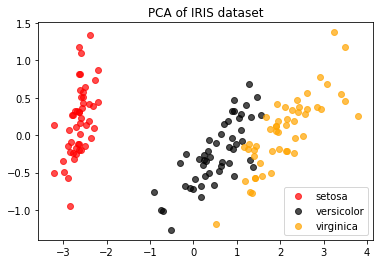

In [7]:
#—————————————4.可视化——————————————
# X_dr[y ==0,0]  # 标签为0的第一个特征的数据

colors = ['red', 'black', 'orange']
iris.target_names

plt.figure()

for i in [0, 1, 2]:
    plt.scatter(X_dr[y == i,0],
                X_dr[y == i,1],
                alpha=0.7,   # 透明度
                c=colors[i],
                label=iris.target_names[i]
                )

plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()


In [8]:
#————————————5.探索降维后的数据—————————————
# 查看降维后每个特征上所带的信息量大小（可解析性方差的大小）
pca.explained_variance_

array([4.22824171, 0.24267075])

In [9]:
# 查看降维后每个特征信息量的占比
# 可解释方差贡献率
pca.explained_variance_ratio_

# 大部分信息都有效的集中到了第一个特征上

array([0.92461872, 0.05306648])

当参数n_components中不填写任何值，则默认返回min(X.shape)个特征，一般来说，样本量都会大于特征数目，
所以什么都不填就相当于转换了新特征空间，但没有减少特征的个数。一般来说，不会使用这种输入方式。但我们
却可以使用这种输入方式来画出累计可解释方差贡献率曲线，以此选择最好的n_components的整数取值

In [10]:
#—————————————6.选择n_components 累计可解释方差贡献率曲线

# 累积可解释方差贡献率曲线是一条以降维后保留的特征个数为横坐标，降维后新特征矩阵捕捉到的可解释方差贡献
# 率为纵坐标的曲线，能够帮助我们决定n_components最好的取值

pca_line = PCA().fit(X)
pca_line.explained_variance_ratio_


array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

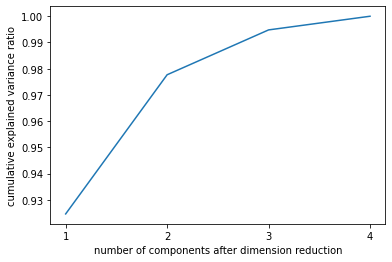

In [11]:
import numpy as np

pca_line = PCA().fit(X)

plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

#### 2.2.2 最大似然估计自选超参数

除了输入整数，n_components还有哪些选择呢？
让PCA用最大似然估计(maximum likelihood estimation)自选超参数的方法，输入“mle”作为n_components的参数输入，就可以调用这种方法

In [14]:
pca_mle = PCA(n_components='mle')
pac_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)

X_mle  # 降到了三维

TypeError: 'tuple' object is not callable

#### 2.2.3 按信息量占比选超参数

输入[0,1]之间的浮点数，并且让参数`svd_solver =='full'`，表示希望降维后的总解释性方差占比大于n_components指定的百分比，即是说，希望保留百分之多少的信息量。比如说，如果我们希望保留97%的信息量，就可以输n_components = 0.97，PCA会自动选出能够让保留的信息量超过97%的特征数量。

In [16]:
pca_f = PCA(n_components=0.97,svd_solver='full')
X_f = pca_f.fit_transform(X)
X_f   # 返回了两列

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [18]:
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [19]:
pca.explained_variance_ratio_.sum()
# 满足97%的要求

0.977685206318795

### 2.3 PCA中的SVD

#### 2.3.1 重要参数svd_solver 与 random_state

参数svd_solver是在降维过程中，用来控制矩阵分解的一些细节的参数。有四种模式可选："auto", "full", "arpack","randomized"，默认”auto"。

- **auto**：基于X.shape和n_components的默认策略来选择分解器：如果输入数据的尺寸大于500x500且要提取的特征数小于数据最小维度min(X.shape)的80％，就启用效率更高的”randomized“方法。否则，精确完整的SVD将被计算，截断将会在矩阵被分解完成后有选择地发生
  
- **full**：**适合数据量比较适中，计算时间充足的情况**
  
- **arpack**：分解时就将特征数量降到n_components中输入的数值k，可以加快运算速度，适合特征矩阵很大的时候，但一般用于**特征矩阵为稀疏矩阵的情况**，此过程包含一定的随机性。
  
- **randomized**：在"full"方法中，分解器会根据原始数据和输入的n_components值去计算和寻找符合需求的新特征向量，但是在"randomized"方法中，分解器会先生成多个随机向量，然后一一去检测这些随机向量中是否有任何一个符合我们的分解需求，如果符合，就保留这个随机向量，并基于这个随机向量来构建后续的向量空间。比"full"模式下计算快很多，并且还能够保证模型运行效果。**适合特征矩阵巨大，计算量庞大的情况。**

而参数random_state在参数svd_solver的值为"arpack" or "randomized"的时候生效，可以控制这两种SVD模式中的随机模式。通常我们就选用”auto“，不必对这个参数纠结太多

#### 2.3.2 重要属性components_

In [20]:
PCA(2).fit(X).components_
PCA(2).fit(X).components_.shape

(2, 4)

##### 1.导入模块

In [21]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

##### 2.实例化数据集

In [22]:
faces = fetch_lfw_people(min_faces_per_person=60)  # 实例化 每个人取出60张照片


In [23]:
faces.images.shape
#怎样理解这个数据的维度？


(1348, 62, 47)

In [24]:
faces.data.shape
#换成特征矩阵之后，这个矩阵是什么样？
X = faces.data

##### 3.特征矩阵进行可视化

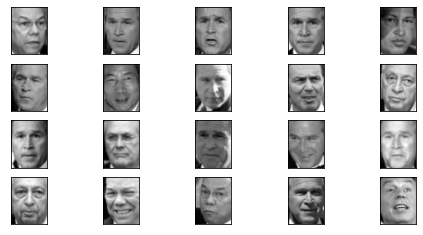

In [31]:
# 创建画布和子图

fig, axes = plt.subplots(4,5,   #4行5列
                        figsize=(8,4),    # 画布的尺寸的比例
                        subplot_kw={'xticks':[],'yticks':[]}) # 不显示坐标轴


# 画布里填充东西
for i,ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:],cmap='gray')  # 选择颜色的模型


In [27]:
axes.shape

(4, 5)

In [29]:
[*enumerate(axes.flat)]  # 索引 + 所有的画图对象

[(0, <AxesSubplot:>),
 (1, <AxesSubplot:>),
 (2, <AxesSubplot:>),
 (3, <AxesSubplot:>),
 (4, <AxesSubplot:>),
 (5, <AxesSubplot:>),
 (6, <AxesSubplot:>),
 (7, <AxesSubplot:>),
 (8, <AxesSubplot:>),
 (9, <AxesSubplot:>),
 (10, <AxesSubplot:>),
 (11, <AxesSubplot:>),
 (12, <AxesSubplot:>),
 (13, <AxesSubplot:>),
 (14, <AxesSubplot:>),
 (15, <AxesSubplot:>),
 (16, <AxesSubplot:>),
 (17, <AxesSubplot:>),
 (18, <AxesSubplot:>),
 (19, <AxesSubplot:>)]

##### 4.建模降维

In [33]:
pca = PCA(150).fit(X)   # 从2900+的维度 讲到150未

V = pca.components_
V.shape    #V（k,n）


(150, 2914)

##### 5.将新特征空间矩阵可视化

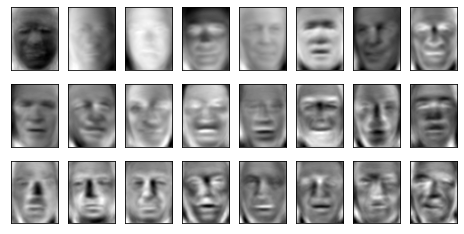

In [34]:
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw={'xticks':[],'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap='gray')

# 特征空间中 比较模糊 主要提取的是眼睛 鼻子 嘴巴

### 2.4 重要接口inverse_transform

特征工程课中，我们学到了神奇的接口inverse_transform，可以将我们归一化，标准化，甚至做过哑变量的特征矩阵还原回原始数据中的特征矩阵，这几乎在向我们暗示，任何有inverse_transform这个接口的过程都是可逆的。

PCA应该也是如此。×  --> 降维过程会丢失噪音是**不可逆的**

#### 2.4.1 迷你案例：用人脸识别看PCA降维后的信息保存量

##### 1.导入模块和数据

In [44]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape


(1348, 62, 47)

In [45]:
faces.data.shape


(1348, 2914)

In [46]:
X = faces.data


##### 2.建模降维，获取降维后的特征矩阵X_dr

In [47]:
pca = PCA(150)
X_dr = pca.fit_transform(X)
X_dr.shape

(1348, 150)

##### 3.将降维后矩阵用inverse_transform返回原空间

In [48]:
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape   # 返回了原来得特征数

(1348, 2914)

##### 4.将特征矩阵X和X_inverse可视化

inverse_transform并没有实现数据的完全逆转。
这是因为，在降维的时候，部分信息已经被舍弃了，X_dr中往往不会包含原数据100%的信息，所以在逆转的时候，即便维度升高，原数据中已经被舍弃的信息也不可能再回来了。所以，**降维不是完全可逆的**

Inverse_transform的功能，是基于X_dr中的数据进行升维，将数据重新映射到原数据所在的特征空间中，而并非恢复所有原有的数据。

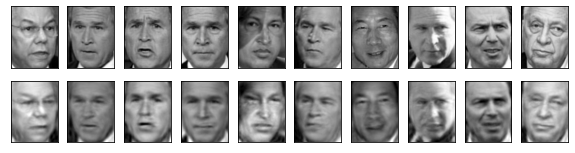

In [53]:
fig, ax = plt.subplots(2,10,figsize=(10,2.5)
                        ,subplot_kw={"xticks":[],"yticks":[]}
)

#和2.3.3节中的案例一样，我们需要对子图对象进行遍历的循环，来将图像填入子图中
#那在这里，我们使用怎样的循环？
#现在我们的ax中是2行10列，第一行是原数据，第二行是inverse_transform后返回的数据
#所以我们需要同时循环两份数据，即一次循环画一列上的两张图，而不是把ax拉平

for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(X_inverse[i].reshape(62,47),cmap="binary_r")

# inverse以后的结果 仍然比不上原来的


#### 2.4.2 迷你案例：用PCA做噪音过滤

降维的目的之一就是希望抛弃掉对模型带来负面影响的特征，而我们相信，带有效信息的特征的方差应该是远大于噪音的，所以相比噪音，有效的特征所带的信息应该不会在PCA过程中被大量抛弃。

inverse_transform能够在不恢复原始数据的情况下，将降维后的数据返回到原本的高维空间，即是说能够实现”保证维度，但去掉方差很小特征所带的信息“。利用inverse_transform的这个性质，我们能够实现噪音过滤

##### 1.导入模块和数据

In [54]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()   # 手写数据集 识别数字0-9
digits.data.shape

# 1797个样本 64个特征

(1797, 64)

##### 2.定义画图函数

In [55]:
digits.images.shape  # 8行8列 64个特征

(1797, 8, 8)

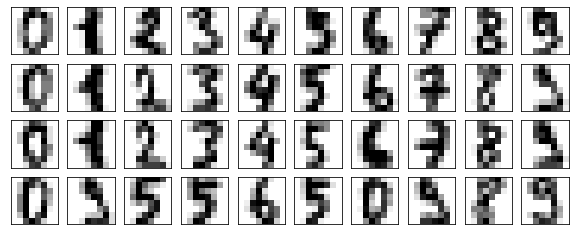

In [56]:
def plot_digits(data):
    # data的节后必须是(m,n), 并且n 要能够被分成(8,8)
    fig, axes = plt.subplots(4,10,figsize=(10,4)
                            ,subplot_kw = {"xticks":[],"yticks":[]}
    )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")
        
plot_digits(digits.data)

##### 3.人为添加噪声

In [57]:
import numpy as np
rng = np.random.RandomState(42)
# 随机抽取服从正态分布的数据

noisy = rng.normal(digits.data,2)
noisy.shape

(1797, 64)

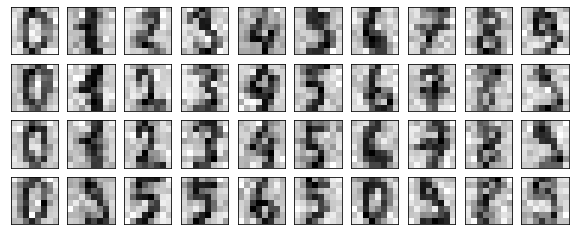

In [58]:
plot_digits(noisy)

##### 4.降维

In [60]:
pca = PCA(0.5,svd_solver='full').fit(noisy)
X_dr = pca.transform(noisy)
X_dr.shape

# 前6个特征包含了50%的信息

(1797, 6)

##### 5.逆转降维结果，实现降噪

只是维度的提升，仍然舍弃了部分的信息 ---> 舍弃的这一部分中 就含有很多噪音

In [61]:
without_noise = pca.inverse_transform(X_dr)
without_noise.shape

(1797, 64)

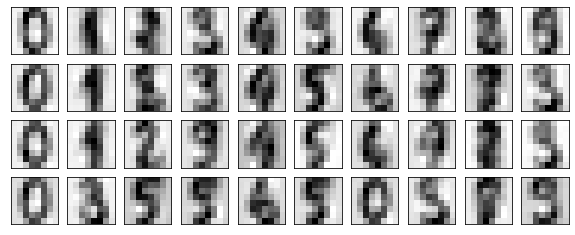

In [62]:
plot_digits(without_noise)

## 3.案例：PCA对手写数字数据集的降维

##### 1.导入需要的模块和库


In [2]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##### 2.导入数据


In [3]:
data = pd.read_csv('./DATASETS/chap3/digit recognizor.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = data.iloc[:,1:]  # 所有行 从1列开始到最后一列
y = data.iloc[:,0] 
X.shape

(42000, 784)

##### 3.计算方差贡献率，找到最佳降维后的维度




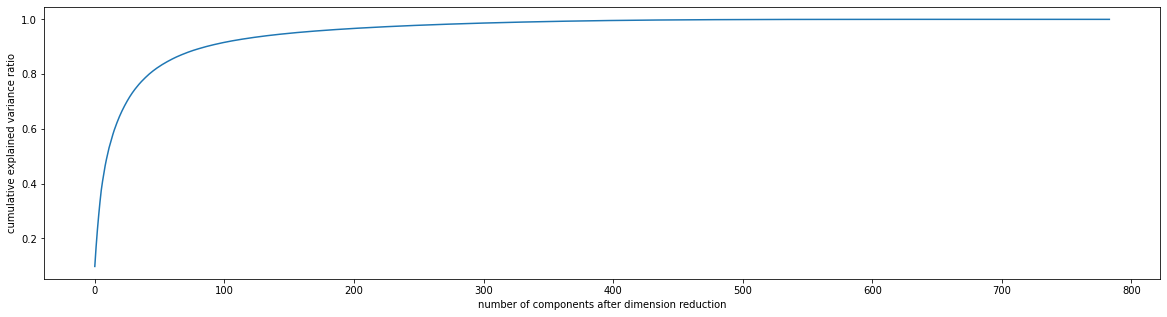

In [8]:
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

##### 4.降维后维度的学习曲线，继续缩小最佳维度的范围

- 选择转折点 特征数选择0-100之间
- 再用随机森林拟合

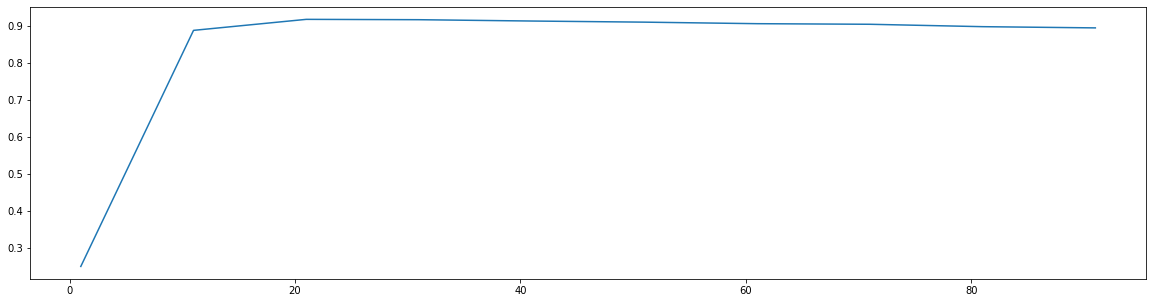

In [9]:
score = []

for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)       # 实例化
    once = cross_val_score(RFC(n_estimators=10,random_state=0)     # 交叉验证
                            ,X_dr,y,cv=5).mean()

    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()


##### 5.细化学习曲线，找出降维后的最佳维度

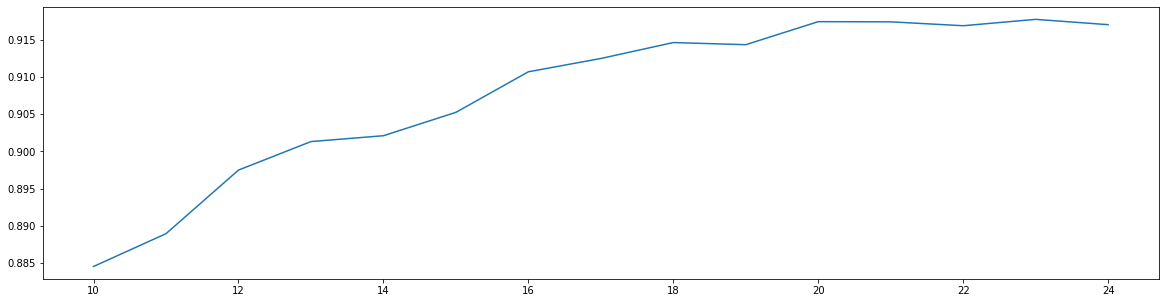

In [11]:
score = []

for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)

plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

##### 6.导入找出的最佳维度进行降维，查看模型效果


In [13]:
X_dr = PCA(24).fit_transform(X)

#======【TIME WARNING:1mins 30s】======#

cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()

# 模型效果还好，跑出了94.49%的水平，但还是没有我们使用嵌入法特征选择过后的96%高，
# 有没有什么办法能够提高模型的表现呢？

0.9462142857142858

##### 7.更换模型KNN

在原始数据集上KNN的效果比RF的很好，但是速度很慢--->现在特征减少了 我们考虑KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),X_dr,y,cv=5).mean()

# 原来使用RF为0.946 
# 使用PCA降维以后 再使用KNN提升到了0.97

0.9702619047619047

##### 8.KNN的K值学习曲线

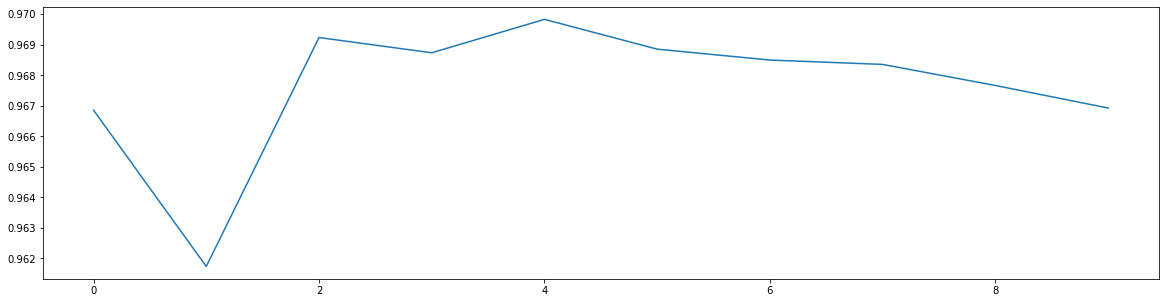

In [15]:
score = []

for i in range(10):
    X_dr = PCA(23).fit_transform(X)   # 实例化
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)

plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()


#####  9.定下超参数后

In [17]:
#=======【TIME WARNING: 3mins】======#
cross_val_score(KNN(4),X_dr,y,cv=5).mean()

0.9691428571428571

可以发现，原本785列的特征被我们缩减到24列之后，用KNN跑出了目前位置这个数据集上最好的结果。再进行更细致的调整，我们也许可以将KNN的效果调整到98%以上。PCA为我们提供了无限的可能，终于不用再因为数据量太庞大而被迫选择更加复杂的模型了